In [1]:
import pandas as pd

In [2]:
excel_file = "/content/metadata (1).xlsx"
df = pd.read_excel(excel_file)


In [3]:
df.head()

,sample_rate,num_frames,num_channels,bits_per_sample,encoding,duration,filename
0,44100,396900,1,16,PCM_S,9.0,artifact__201012172012.wav
1,44100,396900,1,16,PCM_S,9.0,artifact__201105040918.wav
2,44100,396900,1,16,PCM_S,9.0,artifact__201105041959.wav
3,44100,396900,1,16,PCM_S,9.0,artifact__201105051017.wav
4,44100,396900,1,16,PCM_S,9.0,artifact__201105060108.wav


In [5]:
df['filename'].unique()

array(['artifact__201012172012.wav', 'artifact__201105040918.wav',
       'artifact__201105041959.wav', 'artifact__201105051017.wav',
       'artifact__201105060108.wav', 'artifact__201105061143.wav',
       'artifact__201105190800.wav', 'artifact__201105280851.wav',
       'artifact__201106010559.wav', 'artifact__201106010602.wav',
       'artifact__201106021541.wav', 'artifact__201106030612.wav',
       'artifact__201106031558.wav', 'artifact__201106040722.wav',
       'artifact__201106040933.wav', 'artifact__201106040947.wav',
       'artifact__201106041452.wav', 'artifact__201106050353.wav',
       'artifact__201106061233.wav', 'artifact__201106070537.wav',
       'artifact__201106070949.wav', 'artifact__201106101314.wav',
       'artifact__201106101955.wav', 'artifact__201106110909.wav',
       'artifact__201106111119.wav', 'artifact__201106121242.wav',
       'artifact__201106121445.wav', 'artifact__201106131834.wav',
       'artifact__201106131835.wav', 'artifact__201106141701.w

In [16]:
df.dropna(inplace=True)

In [6]:
import librosa
import numpy as np
import os

In [11]:
df2 = pd.read_csv('/content/annotation.csv')

In [12]:
df2.head()

,set,filename,label
0,A,artifact__201012172012.wav,artifact
1,A,artifact__201105040918.wav,artifact
2,A,artifact__201105041959.wav,artifact
3,A,artifact__201105051017.wav,artifact
4,A,artifact__201105060108.wav,artifact


In [13]:
df2.drop(['set'], axis=1, inplace=True)

In [18]:
df2.dropna(inplace=True)

In [14]:
df2.head()

,filename,label
0,artifact__201012172012.wav,artifact
1,artifact__201105040918.wav,artifact
2,artifact__201105041959.wav,artifact
3,artifact__201105051017.wav,artifact
4,artifact__201105060108.wav,artifact


In [41]:
# Merge datasets based on filename
df_merged = pd.merge(df, df2, on="filename")


In [42]:
df_merged.head()

,sample_rate,num_frames,num_channels,bits_per_sample,encoding,duration,filename,label
0,44100,396900,1,16,PCM_S,9.0,artifact__201012172012.wav,artifact
1,44100,396900,1,16,PCM_S,9.0,artifact__201105040918.wav,artifact
2,44100,396900,1,16,PCM_S,9.0,artifact__201105041959.wav,artifact
3,44100,396900,1,16,PCM_S,9.0,artifact__201105051017.wav,artifact
4,44100,396900,1,16,PCM_S,9.0,artifact__201105060108.wav,artifact


In [43]:
df_merged['label'].unique()

array(['artifact', 'extrahls', 'murmur', 'normal', 'extrastole'],
      dtype=object)

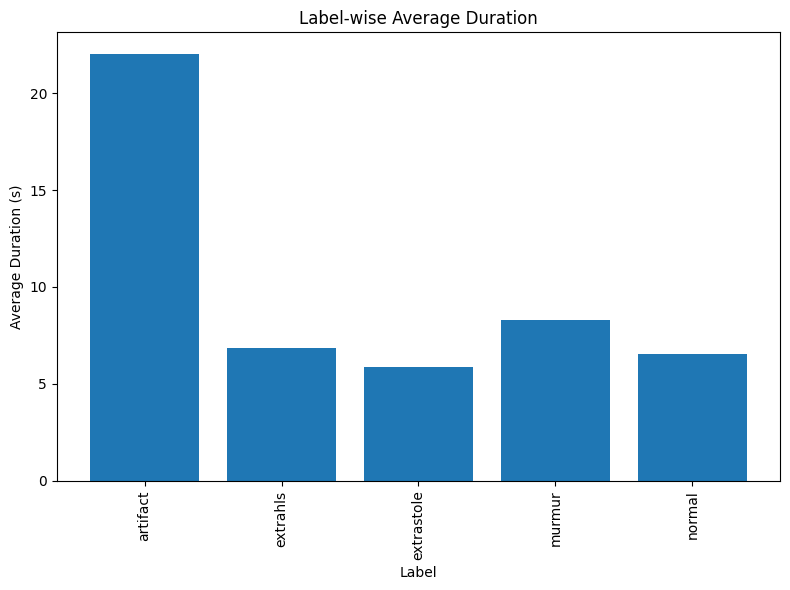

Average duration for each label:
Artifact: 22.031739130434783 seconds
Extrasystole: 6.873157894736842 seconds
Murmur: 5.857391304347826 seconds
Normal: 8.285838926174495 seconds


In [46]:
# Calculate label-wise average duration
label_average_durations = df_merged.groupby('label')['duration'].mean().reset_index()

# Plot label-wise average duration
plt.figure(figsize=(8, 6))
plt.bar(label_average_durations['label'], label_average_durations['duration'])
plt.xlabel('Label')
plt.ylabel('Average Duration (s)')
plt.title('Label-wise Average Duration')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print("Average duration for each label:")
print(f"Artifact: {label_average_durations.iloc[0, 1]} seconds")
print(f"Extrasystole: {label_average_durations.iloc[1, 1]} seconds")
print(f"Murmur: {label_average_durations.iloc[2, 1]} seconds")
print(f"Normal: {label_average_durations.iloc[3, 1]} seconds")


In [48]:
filenames = df_merged["filename"]


In [56]:

!unzip -q "/content/archive (35).zip"

In [61]:
# Define audio file path
audio_path = '/content/DHD/'

# Function to find audio files recursively
def find_audio_files(path):
    audio_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith('.wav'):
                audio_files.append(os.path.join(root, file))
    return audio_files

# Find audio files
audio_files = find_audio_files(audio_path)

# Load audio files into DataFrame
def load_audio(file_path):
    try:
        audio, sr = librosa.load(file_path)
        return audio
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return None
df_merged['audio'] = df_merged['filename'].apply(lambda x: load_audio(next((f for f in audio_files if os.path.basename(f) == x), None)))


In [ ]:
df_merged

In [62]:
df_merged.head()

,sample_rate,num_frames,num_channels,bits_per_sample,encoding,duration,filename,label,audio
0,44100,396900,1,16,PCM_S,9.0,artifact__201012172012.wav,artifact,"[2.550026e-05, -0.0001318825, -0.00017918597, ..."
1,44100,396900,1,16,PCM_S,9.0,artifact__201105040918.wav,artifact,"[-1.1100721e-05, 1.2406431e-06, 1.919992e-06, ..."
2,44100,396900,1,16,PCM_S,9.0,artifact__201105041959.wav,artifact,"[3.8810977e-05, -0.00016810001, -7.2344264e-05..."
3,44100,396900,1,16,PCM_S,9.0,artifact__201105051017.wav,artifact,"[-0.002758689, -0.006625162, -0.0050111725, -0..."
4,44100,396900,1,16,PCM_S,9.0,artifact__201105060108.wav,artifact,"[0.00014182192, 0.0014630128, 0.009762557, 0.0..."


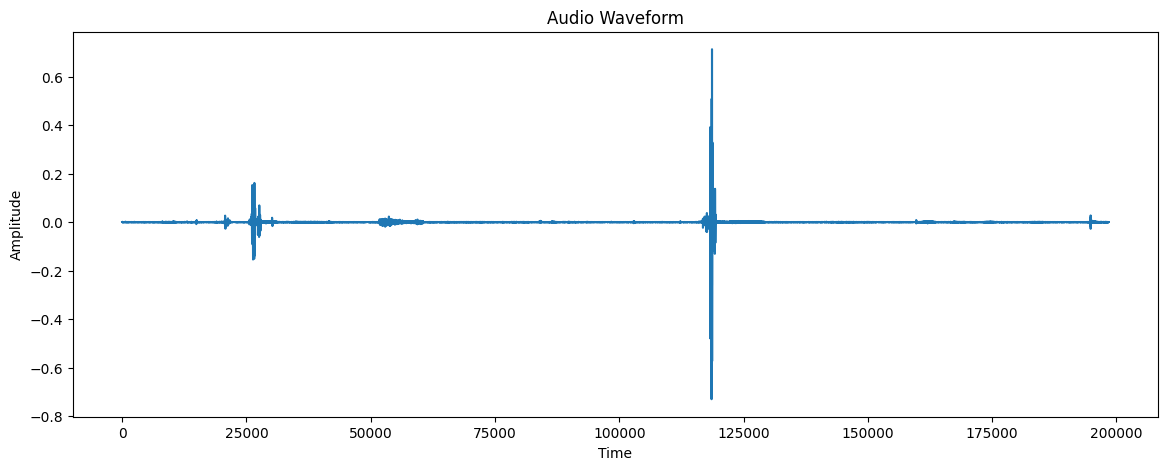

In [70]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 5))
plt.plot(df_merged['audio'].iloc[0])
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

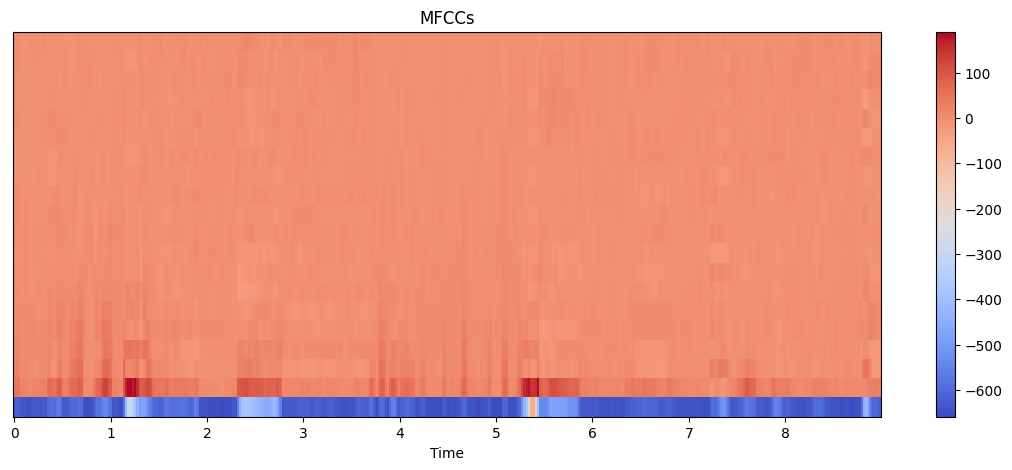

In [69]:

import librosa

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=df_merged['audio'].iloc[0], sr=22050)

# Display MFCCs
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs, sr=22050, x_axis='time')
plt.title('MFCCs')
plt.colorbar()
plt.show()


In [72]:
import librosa
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Extract MFCCs for all audio files
mfccs_all = []
for audio in df_merged['audio']:
    mfccs = librosa.feature.mfcc(y=audio, sr=22050)
    mfccs_mean = np.mean(mfccs, axis=1)  # Take mean of MFCC coefficients
    mfccs_all.append(mfccs_mean)

# Convert to numpy array
mfccs_all = np.array(mfccs_all)

# Split data
X_train, X_test, y_train, y_test = train_test_split(mfccs_all, df_merged['label'], test_size=0.2)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.8120300751879699


In [79]:
# Prediction function
def predict_audio_label(audio):
    mfccs = librosa.feature.mfcc(y=audio, sr=22050)
    mfccs_mean = np.mean(mfccs, axis=1)
    predicted_label = model.predict([mfccs_mean])[0]
    return predicted_label

# Test prediction
new_audio = df_merged['audio'][0]  # Should be replaced with user audio data
predicted_label = predict_audio_label(new_audio)
print(f"Predicted label: {predicted_label}")

Predicted label: artifact


In [84]:
# Save model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)